predict value: 拘
Top 4 result:{"1548": "0.34,拘", "1892": "0.20,枸", "1600": "0.16,掏", "1536": "0.06,拈"}


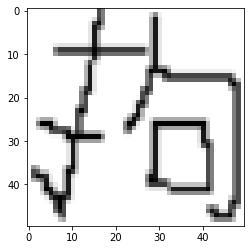

In [6]:
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import copy
import json

def cv_imread(filePath):
    cv_img=cv2.imdecode(np.fromfile(filePath,dtype=np.uint8),-1)
    return cv_img

def img_preprocessing(image, width=50, height=50):
    image = cv_imread(image)
    blur = cv2.GaussianBlur(image, (3, 3), 0)
    gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)[1]
    x, y, w, h = cv2.boundingRect(thresh)
    crop_image = image[y:y + h, x:x + w]
    image = cv2.resize(crop_image, (50, 50))
    return image

def img_reshape(image):
  images = []
  x=img_to_array(image)
  images.append(x)
  images=np.array(images)
  images /= 255
  return images

def showResult(prediction, Top = 3):
    nums = []
    for i in prediction.tolist():
        nums = i
    t = copy.deepcopy(nums)
    dict = {}
    for _ in range(Top):
        number = max(t)
        if number!= 0:
            index = t.index(number)
            t[index] = 0
            # dict[index] = str(number) + ',' + LabelNames[index]
            dict[index] = str(round(Decimal(str(number)),2)) + ',' + LabelNames[index]
    t = []
    jsonData = json.dumps(dict, ensure_ascii=False).encode('utf8')
    return jsonData.decode()

def labelOutput(File, LabelNames):
  with open(File, "r", encoding='big5') as f:
    for line in f.readlines():
      line = line.strip('\n')
      LabelNames.append(line)
  return LabelNames

Top = 4
File = '/content/chineseocr/images/training-data/training-data.txt'
TestingDataPath = '/content/chineseocr/images/testing-data'
ModelPath = '/content/chineseocr/models'
LabelNames = []
ModeName = 'CNN_Model_2375.h5'

LabelNames = labelOutput(File, LabelNames)

os.chdir(ModelPath)
model = load_model(ModeName)

os.chdir(TestingDataPath)

image = img_preprocessing('test.png')
images = img_reshape(image)
# print(images.shape)
prediction = model.predict(images)
maxProbIdx = np.argmax(prediction)
plt.imshow(image)
print('predict value:', LabelNames[maxProbIdx])
result = showResult(prediction, Top)
print(f'Top {Top} result:{result}')


In [17]:
os.chdir('/content/chineseocr/images/training-data')
! unzip -O utf-8 training-data.zip

SyntaxError: ignored

In [ ]:
# label output txt
import os

LabelNames = [x for x in os.listdir('D:/ocr-handwriting/training-data')]

print(os.getcwd())

print(LabelNames)

File = 'D:/OCR/chineseocr/models/training-data.txt'

file = open(File, 'wt')

for i in range(2375):
    print(LabelNames[i])
    file.write(LabelNames[i] +'\n')
file.close()

In [1]:
! nvidia-smi

Wed Jun  2 15:20:06 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
import tensorflow as tf
import keras
print(keras.__version__)
print(tf.__version__)

2.5.0
2.5.0


In [5]:
! python --version


Python 3.7.10
